In [16]:
''' 
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.
Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic
i interpreta els resultats en funció de les teves dades.


Abrir Conexion bbdd y obtener dataFrame
'''

import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt


connection = mysql.connector.connect(host='localhost',
                                         database='new_transactions',
                                         user='root',
                                         password='24ITAc&C@ts3')



try:
   if connection.is_connected():
      print("conectado")

      df = pd.DataFrame
      sql= "SELECT *,c.country as country_comp,u.country as country_user FROM transactions t INNER JOIN companies c on c.id=t.company_id INNER JOIN users u on u.id=t.user_id"
   
      df=pd.read_sql(sql,connection)

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
   if connection.is_connected():
        connection.close()
        print("Connection is closed")


conectado
Connection is closed


C:\Users\Laura\AppData\Local\Temp\ipykernel_4804\2156000259.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(sql,connection)


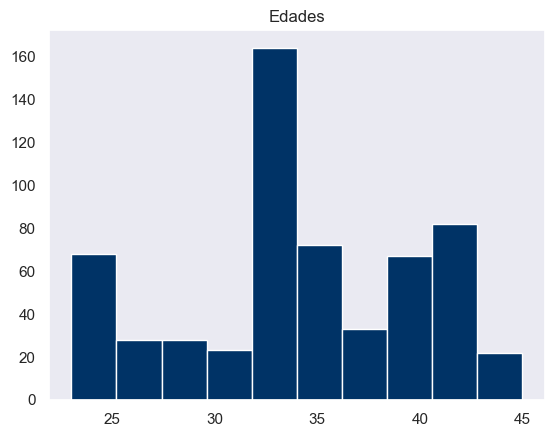

In [27]:
''' *****   Nivell 1 *****

Exercici 1 - Una variable numèrica

S'ha fet un histograma per veure la distribució de les edats dels usuaris. 

Es pot observar que les edats estan compreses entre els 20 i 
els 45 anys, i la edat on hi ha mes usuaris es al voltant dels 35 anys.

'''

import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta


fechasNac=df["birth_date"]
edades=[]

#'%b %d, %Y' Formato Ago 25, 1985
for fecha in fechasNac: # Calculo edad a partir de la fecha de nacimiento
   fecNac=datetime.strptime(fecha,'%b %d, %Y')
   edad=relativedelta(dt.date.today(),fecNac ).years
   edades.append(edad)

df["age"]=edades
plt.hist(df["age"],bins=10,color='#003366',edgecolor="white")
plt.title("Edades")
plt.show()
   



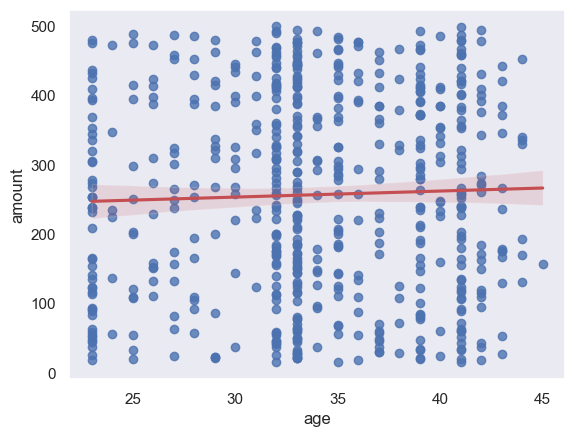

In [260]:
'''  Exercici 2 - Dues variables numèriques. 

S' ha utilitzat un regresion lineal per veure si hi ha relació entre la edat i la quantitat de la venda que ha fet.

Es pot observar que els punts estan distribuits molt lluny de la linea de regresió i això implica que no hi ha una relació lineal, però  
també veiem que la linea de regresió está una mica inclinada cap a dalt, el que indica que a major edat la quantitat de la venda es 
lleugerament major.  

També es pot veure que on hi ha mes vendes es entre 32-33 anys, seguit dels 41, 39 i 24 anys. Les dades als 33 anys 
mostren que hi ha mes vendes als valors de valor alt, en canvi als 32 están una mica mes avall, però en els dos casos estan distribuides 
desde vendes de valor petit als valors mes alts.
'''

import seaborn as sns


sns.set_theme(style="dark")
sns.regplot(x=df["age"], y=df["amount"],line_kws=dict(color="r"))

plt.show()



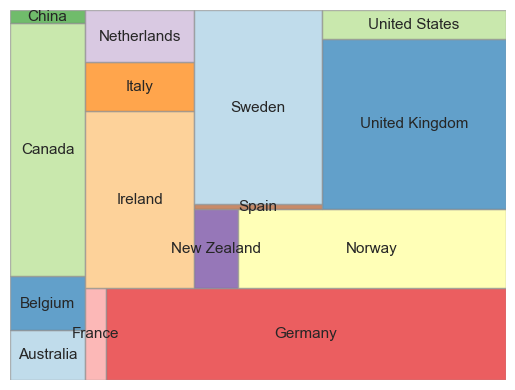

In [19]:

''' Exercici 3 - Una variable categòrica 

S' ha utilitzat un treemap per veure la representació dels països de les companyies, el tamany ens permet veure el numero d' usuaris
que hi ha a cada pais.

Es pot observar que els països amb mes usuaris son Alemanya i Regne Unit i el que tenen menys son Espanya i Xina.

'''
import squarify 

df_group_pais=df.groupby("country_comp")
df_resumePais=df_group_pais["user_id"].count()


dfPaises=df["country_comp"].drop_duplicates().sort_values()


squarify.plot(df_resumePais,label=dfPaises,
              alpha=0.7,ec="#969696",
              color=sns.color_palette("Paired",len(dfPaises)),
              text_kwargs={'fontsize': 11})
plt.axis('off')
plt.show()



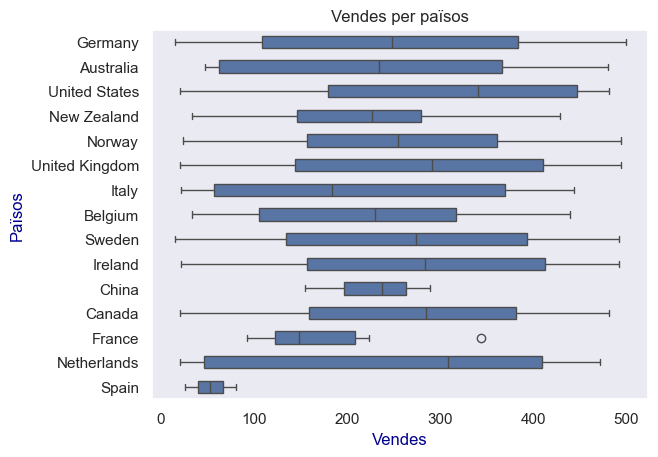

In [20]:
'''  Exercici 4 - Una variable categòrica i una numèrica. 

S' ha utilitzat un boxplot per representar les vendes que hi ha a cada pais de les companyies. Al fer-ho amb un boxplot es pot veure 
el comportament de les vendes en els diferents països, el promig de les vendes i entre quins valors es troben el valor de les compres,
el cos es el 50% de les vendes i els extrems mostren el 25% inferior i el 25% superior respectivament.

Podem observar que Alemanya te un promig de vendes de uns 240$, que el 50% de les vendes estan entre 100$ i 390$, i les vendes varien entre
els pocs dolars als gairebé 500$. En camvi, Espanya te un promig bastant mes baig, al voltant dels 50$, i la més alta no arriba als 90$.
També es pot veure que França té un 'outsider', es a dir, una venda de uns 340$ que està molt per sobre de les altres vendes i es representa
apart per no alterar la representació de les dades.


'''
import numpy as np

sns.set_theme(style="whitegrid")
sns.set_style(style='dark')
sns.boxplot(x=df["amount"], y=df["country_comp"] ,width=0.5)
plt.title ("Vendes per països")
plt.ylabel('Països', color='darkblue')
plt.xlabel('Vendes', color='darkblue')

plt.show()


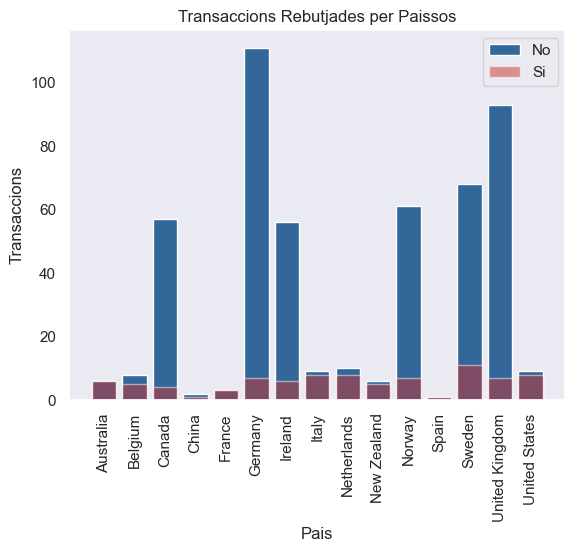

In [335]:

'''  Exercici 5 - Dues variables categòriques. 

S' ha representat les transaccions clasificades en si han estat rebutjades o no per cada pais. Per fer-ho s'ha utilitzat un grafic de barres
apilat, on en blau es representa les transaccions del pais i en vermell les que han estat rebutjades.

Es pot observar que a Australia, França i Espanya hi ha el mateix numero de transaccións acceptades i rebutjades i a Italia i EEUU hi ha poca 
diferencia. Als paisos amb moltes transaccions el percentatge de rebutjades es més petit i en cap cas arriba a les 12 rebutjades a pesar de 
tenir moltes més transaccions.

'''


# Agrupamos por paises y declinadas
df_group_declined=df.groupby(["country_comp","declined"])
df_resumeDec=df_group_declined["timestamp"].count()

# Volver a dataSet
df_resumeDec=df_resumeDec.reset_index()

# Filtros
filNoRechazada=df_resumeDec["declined"]==0
filRechazada=df_resumeDec["declined"]==1

# Dataset filtrado
dfNoRechazada=df_resumeDec[filNoRechazada]
dfRechazada=df_resumeDec[filRechazada]

# Etiquetas
labels='No','Si'

# Ordenamos paises para el eje x
dfPaises=df["country_comp"].drop_duplicates().sort_values()

# Comenzamos la visualización
fig,ax=plt.subplots()
ax.set_title("Transaccions Rebutjades per Paissos")

ax.set_xlabel('Pais')
ax.set_ylabel('Transaccions')
#ax.set_yticks(range(0,dfNoRechazada["timestamp"].max(),10))


plt.bar(dfPaises,dfNoRechazada["timestamp"],color='#336699',alpha=1)
plt.bar(dfPaises,dfRechazada["timestamp"],color="#cc3333",alpha=0.5)

plt.xticks (rotation="vertical")
plt.legend(labels)

plt.show()



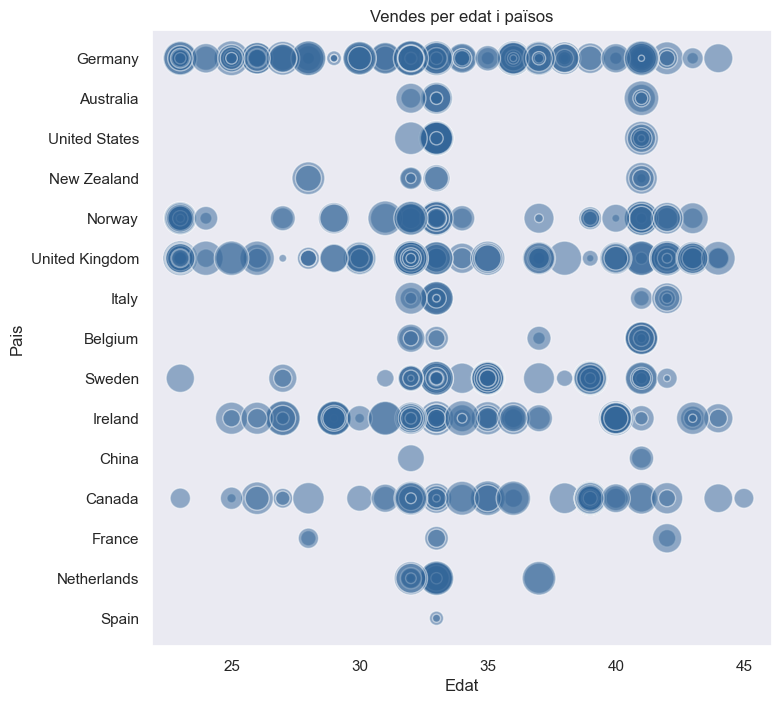

In [344]:
'''  Exercici 6 - Tres variables.  

S' ha utilitzat un grafic de bombolles per mostrar la relació de volum de vendes per paisos i edat. En els eixos estan les edats
i els paisos i el tamany de la bombolla es proporcional a les vendes per aquell pais/grup edat.

Es pot observar que hi ha un comportament diferent segons el pais, a Alemania i Regne Unit les vendes estan distribuides en totes les franjes 
d' Edat i en moltes franjes tenen diverses compras que van desde valors petits a valors grans (es pot veure per tenir cercles concentrics), quan 
mes fosc es el cercle, més vendes d'aquesta quantitat hi ha hagut. En canvi a altres paisos com Australia,EEUU,Italia i Xina les vendes es 
concentren en dos grups, un entre els 30 i 40 anys i un altre sobre els 42 anys, amb vendes de menor quantitat als 42 anys. Espanya te poques
vendes de petita quantitat als 33 anys.

'''

numProductos=[]

for dato in df["product_ids"].values:
    numProductos.append(dato.count(",") + 1)

df["num_products"]=numProductos
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('Edat')
ax.set_ylabel('Pais')
ax.set_title('Vendes per edat i països')

sns.scatterplot(data=df, x="age", y="country_comp", s=df["amount"]*1.3, legend=False, alpha=0.5,c="#336699",linewidth=1)

# show the graph
plt.show()




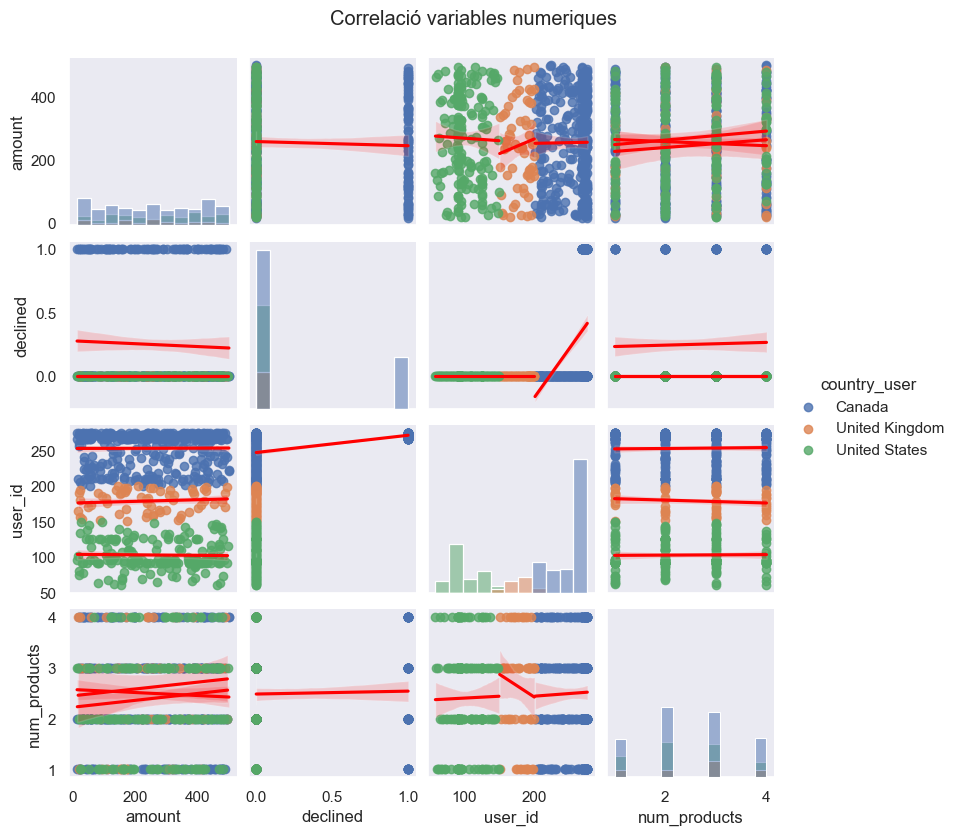

In [361]:
'''  Exercici 7 - Graficar un Pairplot.  

S' ha utilitzat un Pairplot per mostrar les relacions ente la quantitat de la venda, si ha estat declinada o no, el id de usuari i el numero de productes comprats, s' ha afegit un color diferents per mostrar el pais de l'usuari.
Amb el pairplot podem veure les relacions de dos en dos entre les variables.

Es poden observar que el regne unit te menys mostres que els altres paisos, també es pot veure que hi ha una relació entre el numero d'usuari
i el pais de l' usuari. Només hi ha transaccions rebutjades a les companyies de Canadà, i la inclinació de la linea de regresió indica que
s'incrementa el numero transaccions rebutjades amb ids usuaris més alts (usuaris mes recents). 
També podem veur que al Regne unit quan més alt es el id d' usuari (usuari més recent) més alta es la quantitat venuda, en canvi per EEUU la
inclinació es al revés, la linea de regresió va cap abaix i això indica que els usuaris més antics fan compres mes altes.
També es pot veure que es mes frequent comprar 2 productes per compra, seguit a prop per 3 productes.

'''


cols= ['amount','declined','user_id','country_user','num_products','country_comp']
color={'color':'red'}

pp=sns.pairplot(df[cols],diag_kind='hist',kind='reg',plot_kws={'line_kws':color},hue='country_user',height=2,aspect=1)
pp.figure.suptitle("Correlació variables numeriques", y=1.04)
plt.show()

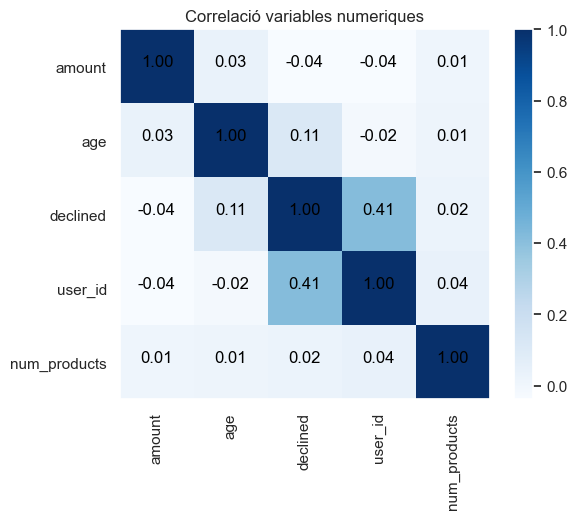

In [346]:
'''        *****   Nivell 2 *****

Exercici 1 - Correlació de totes les variables numèriques.
S' ha utilitza una matriu de correlació per mostrar la correlació entre la quantitat de la venda, la edad, transacció declinada 
(s' ha considerat com numerica valor 0 o 1), id d' usuari i numero de productes comprats.

Es pot observar que no hi ha relació entre el numero de productes comprat i la quantitat comprada, encara que en principi semblava que podria 
haver una relació, això podria indicar que quan s' adquireixen 3 o 4 productes son de menys valor que quan es compra 1 o 2 productes a una mateixa
compra. Si que hi ha una petita relació entre el numero d' usuari i les transaccions declinades, això pot ser pel que hem vist en l' ejercici 
anterior de que només els usuaris de companyies de Canadà tenen transaccions rebutjades i, a més, la linia de regresió estava inclinada cap a dalt.

'''

numProductos=[]

for dato in df["product_ids"].values:
    numProductos.append(dato.count(",") + 1)
    
df["num_products"]=numProductos

# Calculo correlacion de un nuevo DF con las variables numericas seleccionadas
dfNumer=df[['amount','age','declined','user_id','num_products']]
dfCorr=dfNumer.corr()

#Crear figura
fig=plt.figure()
plt.imshow(dfCorr,cmap='Blues')

#Mostrar escala color
plt.colorbar()
miRango=dfCorr['amount'].count()


# añadir valores en el cuadro
for j in range(miRango):
    for i in range(miRango):
       plt.text (i,j,'{:.2f}'.format(dfCorr.values[i,j]),ha='center',color='black')    

# Variables X e y
plt.xticks(range(miRango),dfCorr.index,rotation=90)
plt.yticks(range(miRango),dfCorr.index)
plt.title ("Correlació variables numeriques")

plt.show()

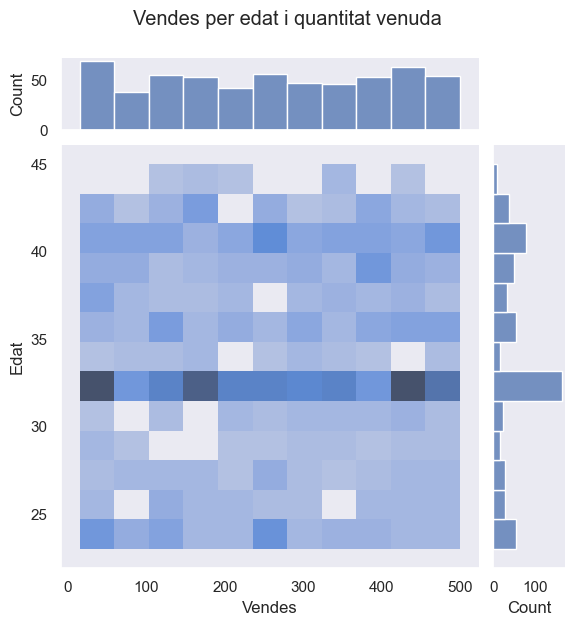

In [384]:
''' Exercici 2 - Implementa un jointplot.

S' ha implementat un jointplot per mostrar les vendes relacionant la edat i la quantitat venuda.
Es pot observar que hi ha dos punts amb mes vendes als 33-34 anys, un amb vendes de menys de 50$ i un altre amb vendes al voltant de 450$.
El seguent punt amb mes vendes seria a la mateixa franja d' edat, amb vendes entre 150$ i 200$.

''' 

jp=sns.jointplot(data=df,x = "amount", y = "age", kind = "hist", marginal_ticks=True) # con historama en todos los ejes y hue
jp.figure.suptitle("Vendes per edat i quantitat venuda", y=1.04)
jp.set_axis_labels('Vendes', 'Edat', fontsize=12)

plt.show()


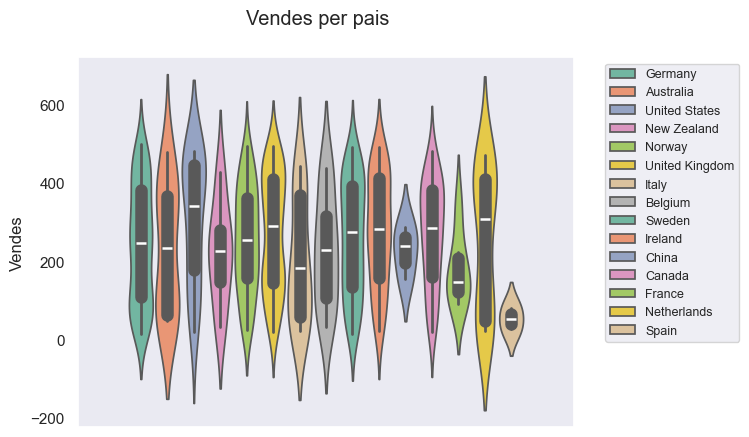

In [395]:
''' ************** Nivell 3 **************  

Exercici 1 - Implementa un violinplot combinat amb un altre tipus de gràfic.

S' ha utilitzat un violinplot amb un boxplot a dintre per mostrar la quantitat venuda, s' ha fet un violinplot per pais de 
companyia.

Es pot observar que el pais que te menys vendes es Espanya. A França les vendes son les segones amb una mitjana mes baixa, tenin la majoria
de vendes per sota de 200$. En canvi UUEE te un major numero de vendes al voltant dels 450$ i la mitjana de vendes mes alta.
'''

vp=sns.violinplot(y = "amount",data=df,inner="boxplot", hue="country_comp",palette = "Set2", gap=.1,
               inner_kws=dict(box_width=9, whis_width=2, color=".35"))
vp.figure.suptitle("Vendes per pais")
vp.set_ylabel("Vendes")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size':9})
plt.show()

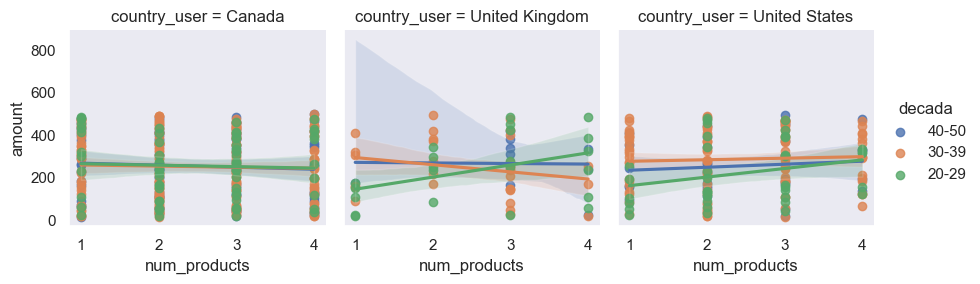

In [399]:
''' Ejercici 2  - Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

S' ha generat un FeceGrid per visualitzar la relació entre el numero de productes comprats, la quantitat comprada, el pais de l'usuari i 
la franja d' edat(decada) de l'usuari.

Es pot observar que el comportament es diferent per cada pais, a Canada hi ha poca relació entre la franja d' edat de l' usuari i el numero de 
productes comprats amb la quantitat de la venda. En canvi, a UK aumenta la quantitat venuda quants mes productes es compren per edats emtre 20
i 30 anys i en canvi disminueix la quantitat a la franja de 30 a 39 anys i es manté un valor similar a la franja de 40 a 50 sense tenir influencia
el numero de productes comprats. Als EEUU sempre hi ha un increment de la quantitat comprada a mida que aumenta el numero de productes comprats, 
sent major entre els 20 i 30 anys i molt petita entre els 30 i 39 anys.
'''

numProductos=[]

for dato in df["product_ids"].values:
    numProductos.append(dato.count(",") + 1)
    
df["num_products"]=numProductos

decada=[]
for dato in df["age"].values:
    if(dato)>=40:
        decada.append ("40-50")
    elif(dato)>=30:
        decada.append ("30-39")
    elif(dato)>=20:
         decada.append ("20-29")    
        
df["decada"]=decada


gf=sns.FacetGrid(df,col="country_user",hue="decada")
gf.map(sns.regplot,"num_products","amount")
gf.add_legend()

plt.show()